## Imports y data load

In [7]:
#imports

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Modelo binario

In [3]:
df_int_binario = pd.read_csv('../data/base_procesada_binaria.csv')
df_int_binario.head()

,Estudios_máximos_antes_de_la_inscripción,estado_civil,sexo,desplazado,Asistencia_diurna/nocturna,Cualificación_promedio_de_estudios_previos,Puntaje_en_examen_de_ingreso,Necesidades_educativas_especiales,Tiene_deuda,Pago_de_matrícula_al_día,...,Carrera_Gestión,Carrera_Ingeniería Informática,Carrera_Periodismo y Comunicación,Carrera_Psicología,Carrera_Publicidad y Marketing,Carrera_Química,Carrera_Sociología,Carrera_Turismo,Carrera_Veterinaria,target_binaria
0,3,1,0,0,1,66,65,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,1,0,1,1,69,66,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,1,69,63,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,1,1,68,68,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,1,1,1,1,68,70,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [4]:
# Separar features y target
X = df_int_binario.drop('target_binaria', axis=1)
y = df_int_binario['target_binaria']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
results_df = pd.DataFrame(columns=['Modelo', 'Hiperparametros', 'Accuracy', 'F1_Score'])

### Regresión logística

In [4]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo_lr = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='liblinear'
)

# Entrenar con datos escalados
modelo_lr.fit(X_train_scaled, y_train)

# Ambas predicciones con datos escalados
y_pred = modelo_lr.predict(X_test_scaled)
y_pred_proba = modelo_lr.predict_proba(X_test_scaled)


Accuracy: 0.8573
F1-score: 0.8884

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4365
           1       0.86      0.91      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.85      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



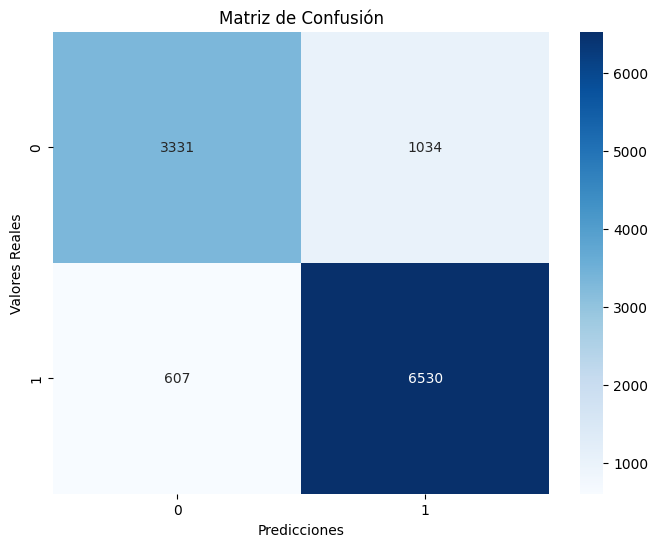

In [5]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# calcular el F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


In [6]:
# Obtener los coeficientes del modelo
coeficientes = modelo_lr.coef_  # o modelo_lr según cuál uses
feature_names = X_train.columns

# Para multiclase, tenemos coeficientes para cada clase
n_classes = len(modelo_lr.classes_)
print(f"Clases: {modelo_lr.classes_}")
print(f"Shape coeficientes: {coeficientes.shape}")

# Calcular importancia absoluta promedio
importancia_abs = np.mean(np.abs(coeficientes), axis=0)

# Crear DataFrame con importancias
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importancia_abs
}).sort_values('importance', ascending=False)

print("\nTop Features más importantes:")
print(feature_importance_df.head(50))

Clases: [0 1]
Shape coeficientes: (1, 41)

Top Features más importantes:
                                           feature  importance
19  Unidades_curriculares_2do_semestre_(aprobadas)    1.518443
15  Unidades_curriculares_1er_semestre_(aprobadas)    0.759686
17   Unidades_curriculares_2do_semestre_(inscrito)    0.624420
9                         Pago_de_matrícula_al_día    0.488658
20                Nota_promedio_en_el_2do_semestre    0.419515
10                                Poseedor_de_Beca    0.375873
13   Unidades_curriculares_1er_semestre_(inscrito)    0.345168
16                Nota_promedio_en_el_1er_semestre    0.286565
26                                 Carrera_Derecho    0.283575
18    Cantidad_de_evaluaciones_en_el_2do_semestre_    0.274544
33                  Carrera_Ingeniería Informática    0.247101
35                              Carrera_Psicología    0.218991
14     Cantidad_de_evaluaciones_en_el_1er_semestre    0.195910
8                                      Tiene_

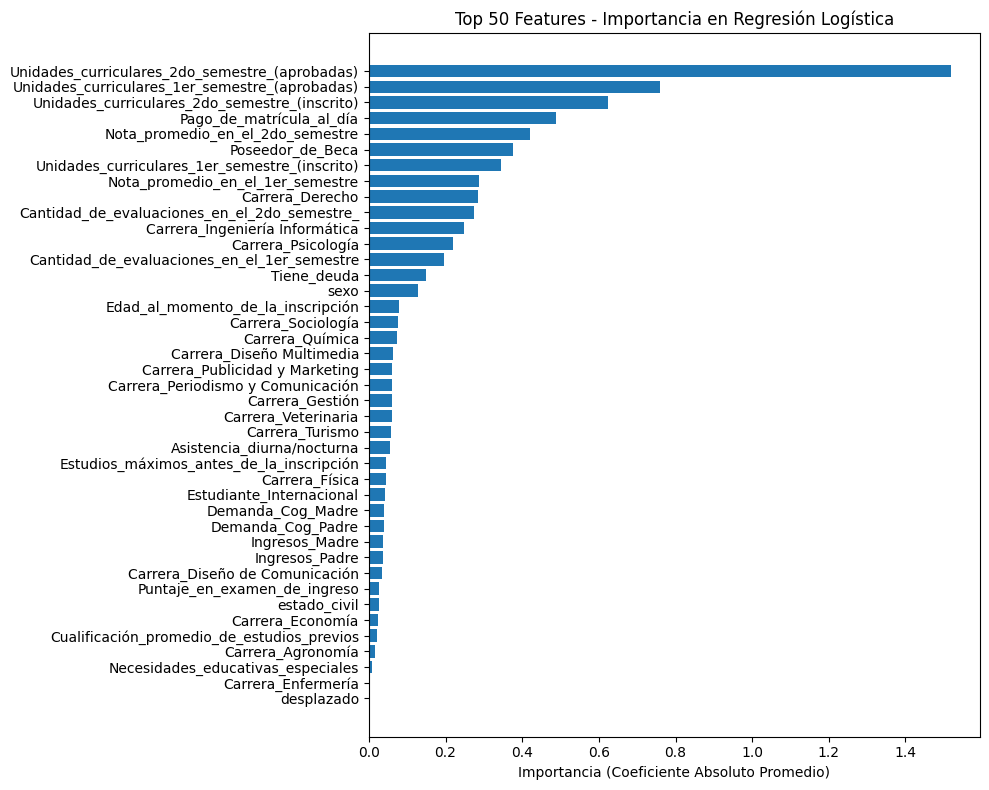

In [7]:
# Plot de las top features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(50)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia (Coeficiente Absoluto Promedio)')
plt.title('Top 50 Features - Importancia en Regresión Logística')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### smote, para manejo de desbalance


Accuracy con SMOTE: 0.8523
F1-score: 0.8799

Reporte de Clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.87      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



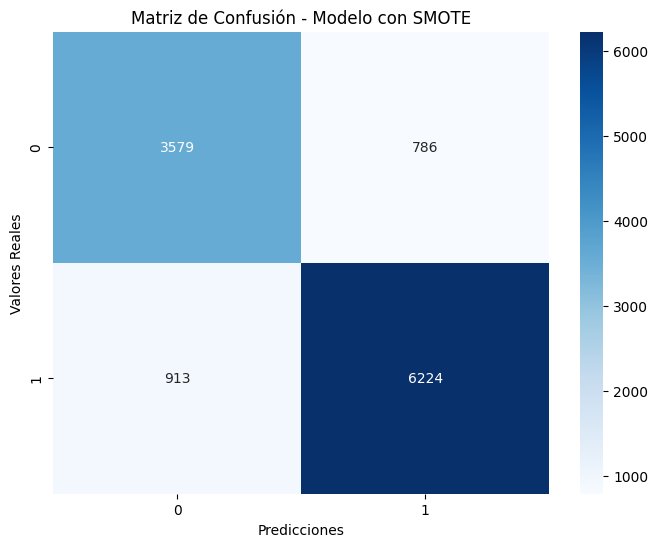

In [8]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1. Escalar los datos ANTES de SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicar SMOTE a los datos escalados
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# 3. Entrenar modelo
modelo_lr_smote = LogisticRegression(
    random_state=42,
    max_iter=10000
)

modelo_lr_smote.fit(X_train_smote, y_train_smote)

# 4. Predicciones (usar datos escalados)
y_pred_smote = modelo_lr_smote.predict(X_test_scaled)
y_pred_proba_smote = modelo_lr_smote.predict_proba(X_test_scaled)

# Evaluación
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"\nAccuracy con SMOTE: {accuracy_smote:.4f}")

# calcular el F1-score
f1 = f1_score(y_test, y_pred_smote)
print(f"F1-score: {f1:.4f}")

print("\nReporte de Clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Modelo con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

### Máquina de vectores de soporte (SVM) 

In [9]:
from sklearn.svm import SVC

# Crea el modelo SVM sin SMOTEs
modelo_svm = SVC(kernel='linear', C=1, random_state=42)

# Entrenar el modelo con los datos de train escalados
modelo_svm.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = modelo_svm.predict(X_test_scaled)

Accuracy SVM: 0.8584
F1-score: 0.8799

Reporte de Clasificación SVM:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4365
           1       0.86      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



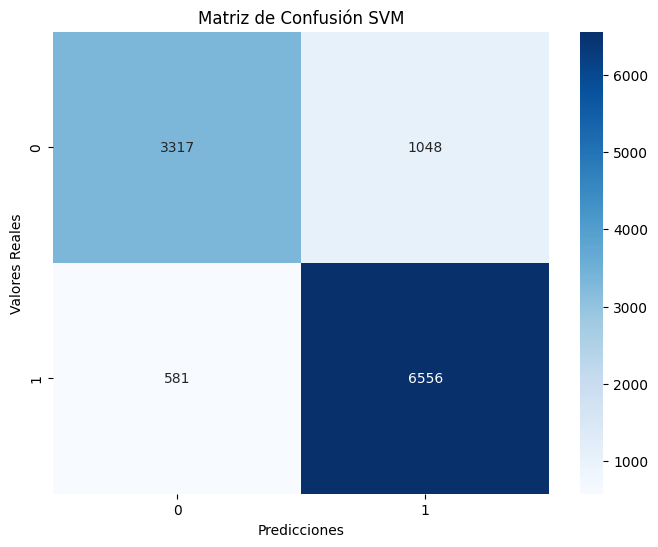

In [ ]:
# --- Evaluación SVM sin SMOTE ---
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm:.4f}")

# calcular el F1-score
f1_score(y_test, y_pred, average=None)
print(f"F1-score: {f1:.4f}")

print("\nReporte de Clasificación SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

#### smote

In [11]:
from sklearn.svm import SVC

# SVM con SMOTE
modelo_svm_smote = SVC(
    kernel='linear', #"rfb"
    #class_weight='balanced',
    probability=True,
    random_state=42
)
modelo_svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = modelo_svm_smote.predict(X_test_scaled)
y_pred_svm_smote_proba = modelo_svm_smote.predict_proba(X_test_scaled)

: 

: 


Accuracy SVM con SMOTE: 0.8533

Reporte de Clasificación SVM con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4365
           1       0.89      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.84     11502
weighted avg       0.85      0.85      0.85     11502



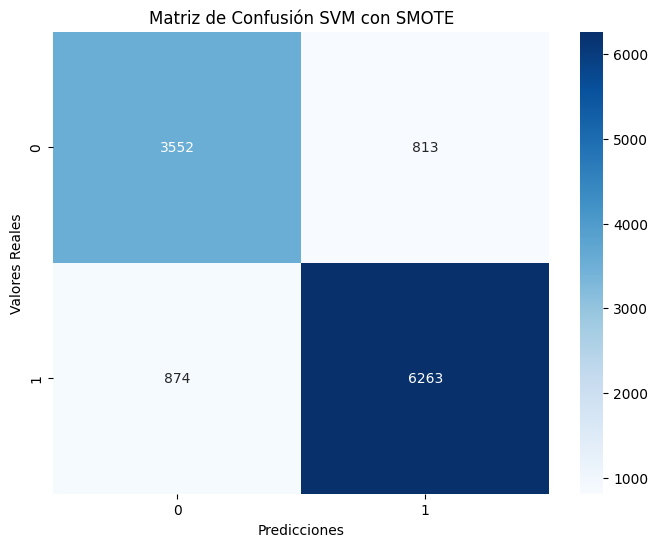

In [ ]:
#Evaluacion matriz confusion SVM con SMOTE
accuracy_svm_smote = accuracy_score(y_test, y_pred_svm_smote)
print(f"\nAccuracy SVM con SMOTE: {accuracy_svm_smote:.4f}")

# calcular el F1-score
f1_score(y_test, y_pred_svm_smote, average=None)
print(f"F1-score: {f1:.4f}")

print("\nReporte de Clasificación SVM con SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_svm_smote = confusion_matrix(y_test, y_pred_svm_smote)
sns.heatmap(cm_svm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión SVM con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

## KNN

In [ ]:
# definir rango de valores de k a probar
k_values = range(1, 21)  # prueba k desde 1 hasta 20

# almacenar resultados
results = []

print("Probando diferentes valores de k:\n")
print(f"{'k':<5} {'Accuracy':<12} {'F1-Score':<10}")
print("-" * 30)

for k in k_values:
    # crear el modelo de KNN con k actual
    model = KNeighborsClassifier(n_neighbors=k)
    
    # entrenar el modelo
    model.fit(X_train, y_train)
    
    # hacer predicciones
    y_pred = model.predict(X_test)
    
    # calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # guardar resultados
    results.append({'k': k, 'accuracy': accuracy, 'f1': f1})
    
    print(f"{k:<5} {accuracy*100:<12.2f} {f1:<10.4f}")

# encontrar el mejor k según accuracy
best_result = max(results, key=lambda x: x['accuracy'])
print("\n" + "="*30)
print(f"Mejor k: {best_result['k']}")
print(f"Accuracy: {best_result['accuracy']*100:.2f}%")
print(f"F1-Score: {best_result['f1']:.4f}")

Probando diferentes valores de k:

k     Accuracy     F1-Score  
------------------------------
1     76.96        0.8174    
2     75.83        0.7895    
3     80.07        0.8453    
4     80.47        0.8410    
5     81.46        0.8568    
6     81.66        0.8540    
7     82.13        0.8624    
8     81.94        0.8576    
9     82.18        0.8629    
10    82.50        0.8625    
11    82.32        0.8641    
12    82.79        0.8655    
13    82.56        0.8660    
14    82.74        0.8655    
15    82.55        0.8661    
16    82.79        0.8663    
17    82.63        0.8668    
18    82.77        0.8664    
19    82.69        0.8673    
20    82.73        0.8664    

Mejor k: 12
Accuracy: 82.79%
F1-Score: 0.8655


In [ ]:
# definir grid de hiperparámetros
param_grid = {
    'n_neighbors': range(4, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # distancia a usar
}

# crear modelo base
knn = KNeighborsClassifier()

# búsqueda con validación cruzada
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # optimizar por F1
    n_jobs=-1  # usar todos los cores
)

# entrenar
grid_search.fit(X_train, y_train)

# mejores parámetros
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# evaluar en test
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nResultados en test:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1-Score: {f1:.4f}")

Mejores hiperparámetros:
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

Resultados en test:
Accuracy: 83.40%
F1-Score: 0.8721


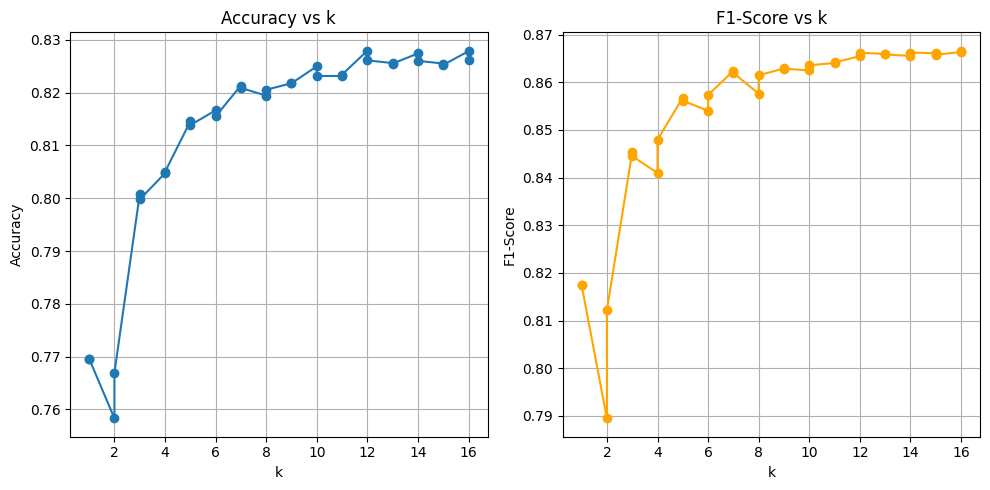

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot([r['k'] for r in results], [r['accuracy'] for r in results], marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([r['k'] for r in results], [r['f1'] for r in results], marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('F1-Score')
plt.title('F1-Score vs k')
plt.grid(True)

plt.tight_layout()
plt.show()

### Árboles de Decisión 


In [ ]:
### Random Forest sin SMOTE

from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)   
 
#Evaluacion matriz confusion Random Forest sin SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Random Forest: {accuracy_rf:.4f}")


Accuracy Random Forest: 0.8583


Accuracy de la clasificación: 85.83%

Reporte de Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4365
           1       0.87      0.91      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.85      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502



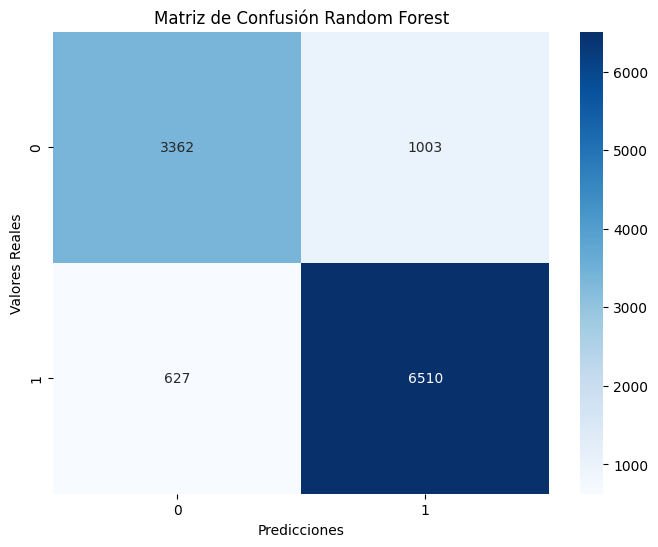

In [ ]:
#Accuracy RF sin smote
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))
f1 = f1_score(y_test, y_pred, average='binary')

#matriz de confusion RF sin smote
print("\nReporte de Clasificación Random Forest:")  
print(f"F1-Score: {f1:.4f}")

print(classification_report(y_test, y_pred_rf))
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Random Forest')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()


#### smote

In [ ]:
#Generar modelo con random forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf_smote = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)

modelo_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = modelo_rf_smote.predict(X_test_scaled)    



Accuracy RF con SMOTE: 0.8476

Reporte de Clasificación RF con SMOTE:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4365
           1       0.87      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.84      0.84     11502
weighted avg       0.85      0.85      0.85     11502

Accuracy de la clasificación: 84.76%


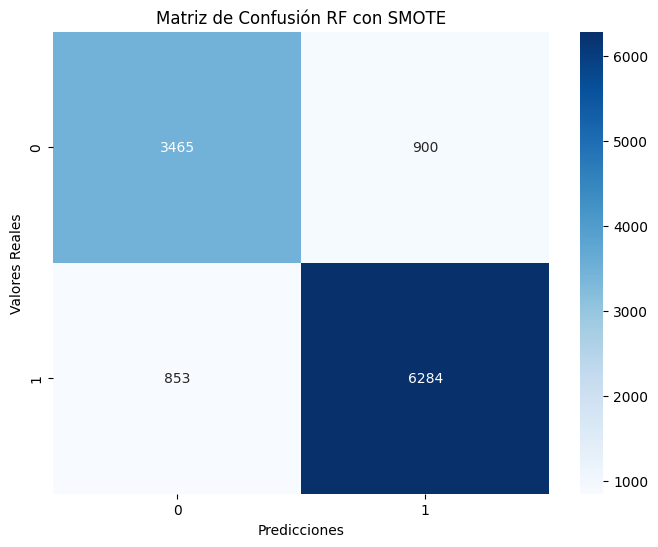

In [ ]:
#Accuracy RF con SMOTE
accuracy_rf = accuracy_score(y_test, y_pred_rf_smote)
print(f"\nAccuracy RF con SMOTE: {accuracy_rf:.4f}")

#reporte de clasificación RF con SMOTE
print("\nReporte de Clasificación RF con SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))
print("Accuracy de la clasificación: {:.2f}%".format(accuracy_rf * 100))

#matriz de confusión RF con SMOTE
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf_smote    )
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión RF con SMOTE')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

#### Optuna para RF sin SMOTE

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Definimos el espacio de búsqueda de hiperparámetros
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    # Definir el modelo
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar con los datos escalados sin SMOTE
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc

# Crear el estudio
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # podés subir n_trials (ej: 100) si tenés tiempo

# Mostrar los mejores parámetros y el mejor score
print("Mejores hiperparámetros:", study.best_params)
print("Mejor accuracy:", study.best_value)


/Users/sofiaforni/Documents/FCEN UBA Maestria/aprendizaje automatico 2025/aprendizaje_automatico_desertores/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-13 00:21:54,796] A new study created in memory with name: no-name-e8d7caa7-9dba-46c0-8a7f-7cf66a173d23
[I 2025-10-13 00:21:55,470] Trial 0 finished with value: 0.8564597461311076 and parameters: {'n_estimators': 228, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8564597461311076.
[I 2025-10-13 00:21:56,054] Trial 1 finished with value: 0.8513302034428795 and parameters: {'n_estimators': 277, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8564597461311076.
[I 2025-10-13 00:21:57,087] Trial 2

KeyboardInterrupt: 

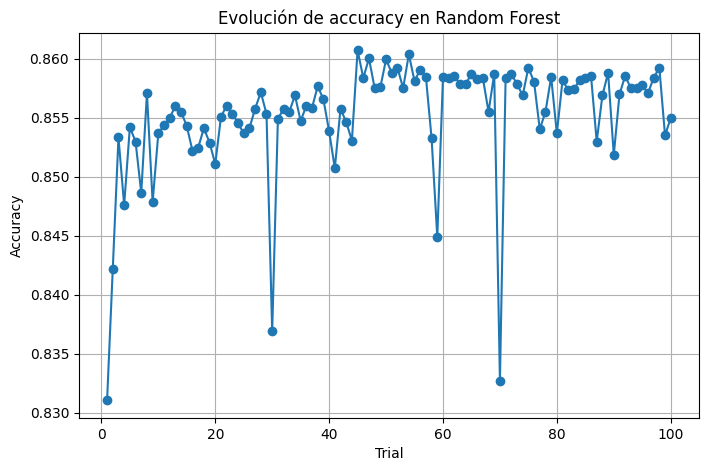

In [ ]:
import matplotlib.pyplot as plt

# Extraer los valores de accuracy de cada trial
accuracies = [t.value for t in study.trials]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
plt.title("Evolución de accuracy en Random Forest")
plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## VOTING

In [ ]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Pipeline permite encadenar múltiples pasos de procesamiento o modelos en un solo objeto.
#Con esta función le pido crear cada versión con y sin SMOTE de Regresión, SVM y RF.
#Yo voy a hacer que se vote entre todas las combinaciones posibles pero se podría hacer una votación entre modelos con smote y una votación entre modelos sin smote.

pipe_lr = Pipeline([('lr', LogisticRegression(random_state=42, class_weight='balanced', max_iter=10000))])
pipe_lr_smote = Pipeline([('smote', SMOTE(random_state=42)),('lr', LogisticRegression(random_state=42, max_iter=10000))])

pipe_svm = Pipeline([('svm', SVC(probability=True, random_state=42, kernel='linear', C=1))])
pipe_svm_smote = Pipeline([('smote', SMOTE(random_state=42)),('svm', SVC(probability=True, random_state=42, kernel='linear'))])

pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced',))])
pipe_rf_smote = Pipeline([('smote', SMOTE(random_state=42)),('rf', RandomForestClassifier(random_state=42, n_estimators=500, max_depth=6))])


voting_clf = VotingClassifier(
    estimators=[
        ('lr', pipe_lr),            
        ('lr_smote', pipe_lr_smote),
        ('svm', pipe_svm),
        ('svm_smote', pipe_svm_smote),
        ('rf', pipe_rf),
        ('rf_smote', pipe_rf_smote)], voting='hard')    #SOFT PARA PREDICCIÓN DE PROBA. HARD PARA PREDICCIÓN DE CLASE.


#voting concatena la información de todas las salidas para predecir.
voting_clf.fit(X_train_scaled, y_train)

,estimators,"[('lr', ...), ('lr_smote', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [ ]:
print(f"Accuracy training : {voting_clf.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy test: {voting_clf.score(X_test_scaled, y_test):.3f}")

Accuracy training : 0.858
Accuracy test: 0.854


VOTING CLASSIFIER - RESULTADO FINAL
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4365
           1       0.89      0.88      0.88      7137

    accuracy                           0.85     11502
   macro avg       0.84      0.85      0.85     11502
weighted avg       0.85      0.85      0.85     11502



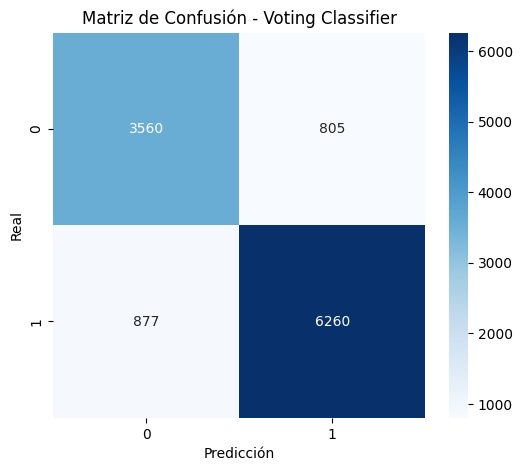

In [ ]:
# Predicciones del voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)

print("VOTING CLASSIFIER - RESULTADO FINAL")
print("="*60)
print(classification_report(y_test, y_pred_voting))

# Matriz de confusión
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Voting Classifier')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

## Boosting

In [ ]:
# Tu modelo binario
model = lgb.LGBMClassifier(
    objective='binary',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    verbose=-1 
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8628
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4365
           1       0.87      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.85      0.85     11502
weighted avg       0.86      0.86      0.86     11502



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Distribuciones de hiperparámetros
param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 150),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.6, 0.4),          # entre 0.6 y 1.0
    'colsample_bytree': uniform(0.6, 0.4),   # entre 0.6 y 1.0
    'reg_alpha': uniform(0, 1),              # regularización L1
    'reg_lambda': uniform(0, 1)              # regularización L2
}

lgbm = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    verbose=-1
)

random_search = RandomizedSearchCV(
    lgbm,
    param_distributions,
    n_iter=100,           
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6727299868828402, learning_rate=0.06502135295603015, max_depth=14, min_child_samples=67, n_estimators=71, num_leaves=108, reg_alpha=0.2912291401980419, reg_lambda=0.6118528947223795, subsample=0.6557975442608167; total time=  14.2s
[CV] END colsample_bytree=0.6727299868828402, learning_rate=0.06502135295603015, max_depth=14, min_child_samples=67, n_estimators=71, num_leaves=108, reg_alpha=0.2912291401980419, reg_lambda=0.6118528947223795, subsample=0.6557975442608167; total time=  14.3s
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.2952142919229748, max_depth=13, min_child_samples=81, n_estimators=238, num_leaves=40, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797; total time=  16.2s
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.2952142919229748, max_depth=13, min_child_samples=81, n_estimators=238, num_leaves=40, reg_alpha

In [18]:
print("\nMejores hiperparámetros:")
print(random_search.best_params_)

# Evaluar
y_pred = random_search.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='binary'):.4f}")
print("\n" + classification_report(y_test, y_pred))


Mejores hiperparámetros:
{'colsample_bytree': np.float64(0.8428136990746738), 'learning_rate': np.float64(0.092799754606763), 'max_depth': 3, 'min_child_samples': 98, 'n_estimators': 376, 'num_leaves': 28, 'reg_alpha': np.float64(0.7722447692966574), 'reg_lambda': np.float64(0.1987156815341724), 'subsample': np.float64(0.602208846849441)}

Accuracy: 0.8613
F1-Score: 0.8913

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4365
           1       0.87      0.92      0.89      7137

    accuracy                           0.86     11502
   macro avg       0.86      0.84      0.85     11502
weighted avg       0.86      0.86      0.86     11502

